IMPORTS

In [2]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import os
from PIL import Image

C:\Users\war machine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LOAD MODEL

In [3]:
model_name = "openai/clip-vit-base-patch16" # you can change model name here with patch size -- search in Hugging face.
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

In [4]:
categorie = [
    "airplane","ball","car",
    "cat","dolphin","face",
    "lotus","pickles","strawberry"
    ]
text_prompts = [f"a photo of a {label}"for label in categorie]

In [11]:
class CustomDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]
        
        # Extraire les classes uniques des noms de fichiers (tout ce qui est avant le '_')
        self.classes = sorted(list(set(f.split('_')[0] for f in self.image_files)))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.data_dir, img_name)
        image = Image.open(img_path)
        
        # Obtenir la classe à partir du nom du fichier
        class_name = img_name.split('_')[0]
        label = self.class_to_idx[class_name]
        
        return image, label

dataset = CustomDataset("./TP1_data/database")

def pil_collate_fn(batch):
    # batch is a list of (pil_image, label) pairs
    # Just return them as two lists (or lists of size 1 if batch_size=1)
    pil_images = [item[0] for item in batch]
    labels = [item[1] for item in batch]
    return pil_images, labels

dataloader = DataLoader(
    dataset,
    batch_size=1,  # can increase this if you like
    shuffle=True,
    collate_fn=pil_collate_fn
)

# Pour vérifier que tout fonctionne
print(f"Classes trouvées : {dataset.classes}")
print(f"Nombre total d'images : {len(dataset)}")

Classes trouvées : ['airplane', 'ball', 'car', 'cat', 'dolphin', 'face', 'lotus', 'pickles']
Nombre total d'images : 40


In [12]:
def display_image_and_predictions(pil_image, true_label_idx, probs, text_prompts):
    """
    Displays the given PIL image with its true label,
    along with the probabilities for each text prompt.
    """
    # Show the image
    plt.imshow(pil_image)
    plt.axis('off')
    plt.title(f"True Label: {categorie[true_label_idx]}")
    plt.show()

    # Print probabilities
    print("Label probabilities:")
    for prompt, prob in zip(text_prompts, probs):
        print(f"{prompt}: {prob:.2%}")

    # Print predicted class
    predicted_class = text_prompts[probs.argmax()]
    print(f"Predicted class: {predicted_class}")
    print("-" * 50)

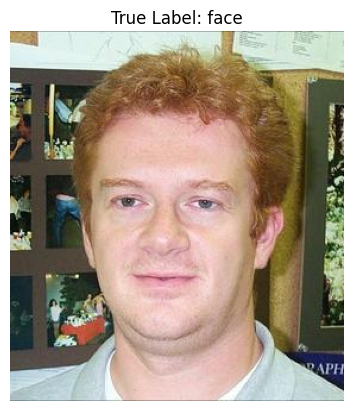

Label probabilities:
a photo of a airplane: 0.07%
a photo of a ball: 0.57%
a photo of a car: 0.22%
a photo of a cat: 0.58%
a photo of a dolphin: 0.05%
a photo of a face: 97.02%
a photo of a lotus: 0.01%
a photo of a pickles: 1.25%
a photo of a strawberry: 0.22%
Predicted class: a photo of a face
--------------------------------------------------


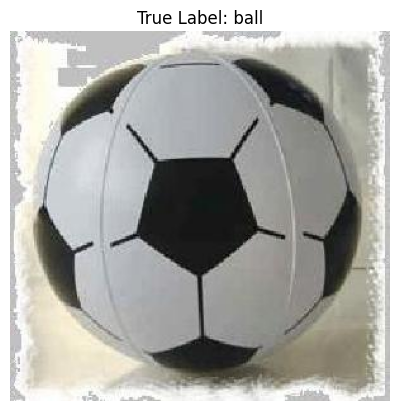

Label probabilities:
a photo of a airplane: 0.00%
a photo of a ball: 99.95%
a photo of a car: 0.03%
a photo of a cat: 0.00%
a photo of a dolphin: 0.00%
a photo of a face: 0.01%
a photo of a lotus: 0.00%
a photo of a pickles: 0.00%
a photo of a strawberry: 0.00%
Predicted class: a photo of a ball
--------------------------------------------------


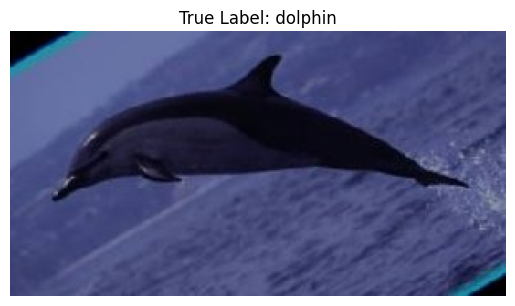

Label probabilities:
a photo of a airplane: 0.01%
a photo of a ball: 0.00%
a photo of a car: 0.00%
a photo of a cat: 0.00%
a photo of a dolphin: 99.97%
a photo of a face: 0.01%
a photo of a lotus: 0.00%
a photo of a pickles: 0.00%
a photo of a strawberry: 0.00%
Predicted class: a photo of a dolphin
--------------------------------------------------


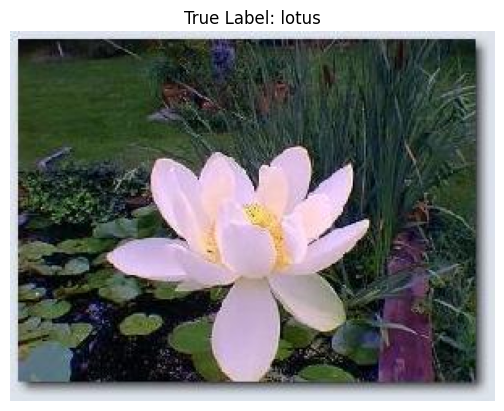

Label probabilities:
a photo of a airplane: 0.00%
a photo of a ball: 0.01%
a photo of a car: 0.01%
a photo of a cat: 0.01%
a photo of a dolphin: 0.00%
a photo of a face: 0.09%
a photo of a lotus: 99.88%
a photo of a pickles: 0.01%
a photo of a strawberry: 0.00%
Predicted class: a photo of a lotus
--------------------------------------------------


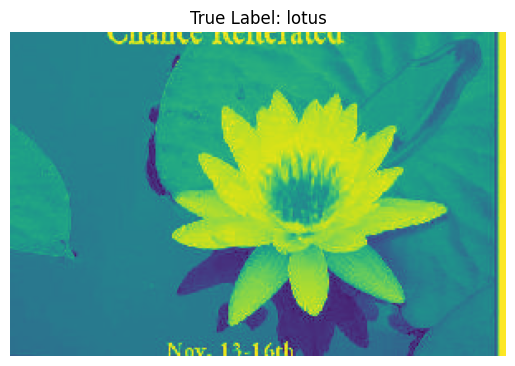

Label probabilities:
a photo of a airplane: 0.42%
a photo of a ball: 0.05%
a photo of a car: 1.17%
a photo of a cat: 0.03%
a photo of a dolphin: 0.03%
a photo of a face: 2.02%
a photo of a lotus: 95.46%
a photo of a pickles: 0.73%
a photo of a strawberry: 0.08%
Predicted class: a photo of a lotus
--------------------------------------------------


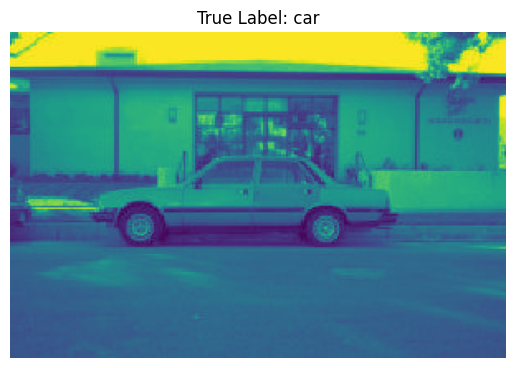

Label probabilities:
a photo of a airplane: 0.03%
a photo of a ball: 0.02%
a photo of a car: 99.67%
a photo of a cat: 0.02%
a photo of a dolphin: 0.01%
a photo of a face: 0.03%
a photo of a lotus: 0.08%
a photo of a pickles: 0.14%
a photo of a strawberry: 0.00%
Predicted class: a photo of a car
--------------------------------------------------


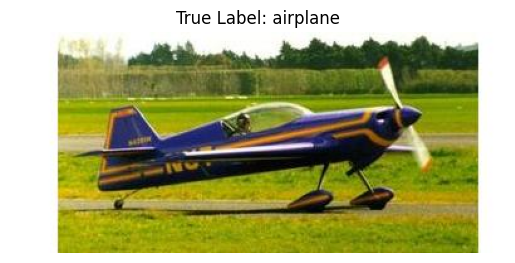

Label probabilities:
a photo of a airplane: 99.30%
a photo of a ball: 0.00%
a photo of a car: 0.51%
a photo of a cat: 0.01%
a photo of a dolphin: 0.01%
a photo of a face: 0.01%
a photo of a lotus: 0.13%
a photo of a pickles: 0.03%
a photo of a strawberry: 0.00%
Predicted class: a photo of a airplane
--------------------------------------------------


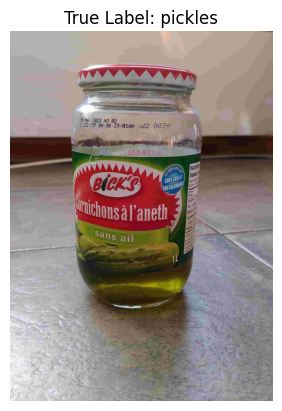

Label probabilities:
a photo of a airplane: 0.00%
a photo of a ball: 0.03%
a photo of a car: 0.01%
a photo of a cat: 0.01%
a photo of a dolphin: 0.00%
a photo of a face: 0.03%
a photo of a lotus: 0.07%
a photo of a pickles: 99.85%
a photo of a strawberry: 0.00%
Predicted class: a photo of a pickles
--------------------------------------------------


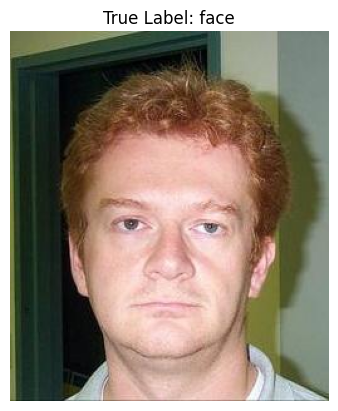

Label probabilities:
a photo of a airplane: 0.05%
a photo of a ball: 0.17%
a photo of a car: 0.25%
a photo of a cat: 0.32%
a photo of a dolphin: 0.01%
a photo of a face: 96.88%
a photo of a lotus: 0.00%
a photo of a pickles: 1.81%
a photo of a strawberry: 0.50%
Predicted class: a photo of a face
--------------------------------------------------


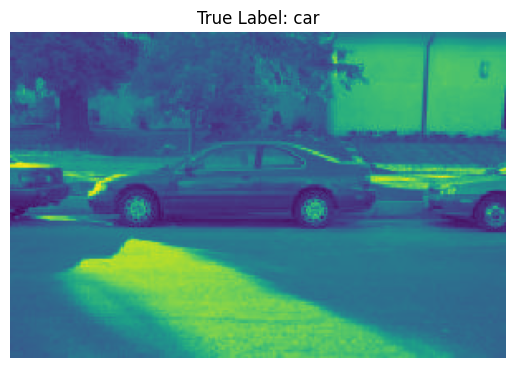

Label probabilities:
a photo of a airplane: 0.02%
a photo of a ball: 0.04%
a photo of a car: 99.78%
a photo of a cat: 0.01%
a photo of a dolphin: 0.00%
a photo of a face: 0.04%
a photo of a lotus: 0.03%
a photo of a pickles: 0.07%
a photo of a strawberry: 0.00%
Predicted class: a photo of a car
--------------------------------------------------


In [13]:
num_samples_to_display = 10

for i, (pil_images, labels) in enumerate(dataloader):
    if i == num_samples_to_display:
        break

    # pil_images is a list of size=1 (since batch_size=1)
    pil_image = pil_images[0]
    label = labels[0]

    # Preprocess image (PIL) and text using CLIPProcessor
    inputs = processor(
        text=text_prompts,
        images=pil_image,
        return_tensors="pt",
        padding=True
    )

    # Inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get probabilities
    logits_per_image = outputs.logits_per_image  # shape [batch_size, num_text_prompts]
    probs = logits_per_image.softmax(dim=1).squeeze()

    # Display the result
    display_image_and_predictions(pil_image, label, probs, text_prompts)


Test on Query images

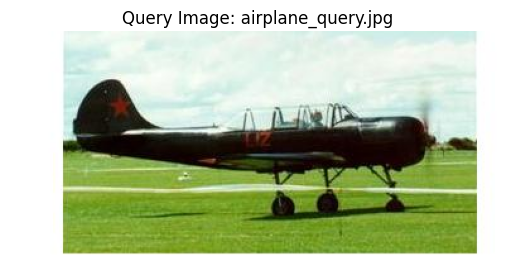

Results for airplane_query.jpg:
a photo of a airplane: 95.51%
a photo of a ball: 0.08%
a photo of a car: 3.70%
a photo of a cat: 0.30%
a photo of a dolphin: 0.01%
a photo of a face: 0.12%
a photo of a lotus: 0.21%
a photo of a pickles: 0.03%
a photo of a strawberry: 0.04%
Predicted class: a photo of a airplane
--------------------------------------------------


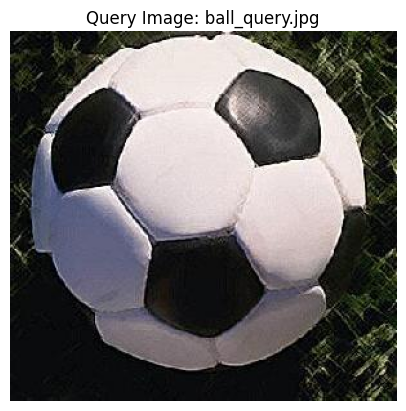

Results for ball_query.jpg:
a photo of a airplane: 0.01%
a photo of a ball: 99.74%
a photo of a car: 0.03%
a photo of a cat: 0.01%
a photo of a dolphin: 0.00%
a photo of a face: 0.14%
a photo of a lotus: 0.00%
a photo of a pickles: 0.03%
a photo of a strawberry: 0.05%
Predicted class: a photo of a ball
--------------------------------------------------


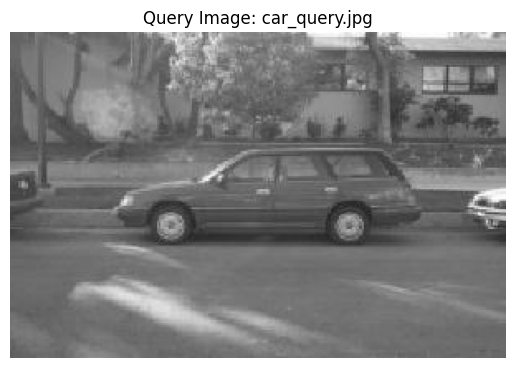

Results for car_query.jpg:
a photo of a airplane: 0.01%
a photo of a ball: 0.02%
a photo of a car: 99.90%
a photo of a cat: 0.02%
a photo of a dolphin: 0.00%
a photo of a face: 0.02%
a photo of a lotus: 0.02%
a photo of a pickles: 0.01%
a photo of a strawberry: 0.00%
Predicted class: a photo of a car
--------------------------------------------------


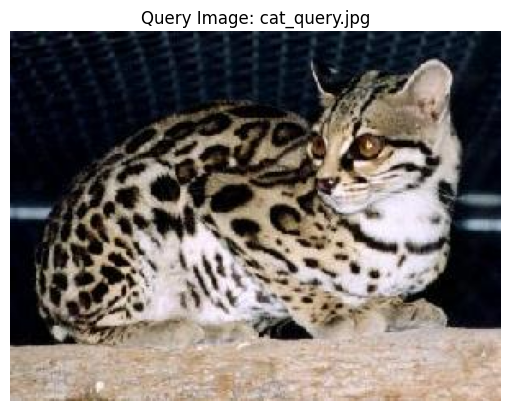

Results for cat_query.jpg:
a photo of a airplane: 0.00%
a photo of a ball: 0.07%
a photo of a car: 0.24%
a photo of a cat: 99.06%
a photo of a dolphin: 0.00%
a photo of a face: 0.58%
a photo of a lotus: 0.00%
a photo of a pickles: 0.06%
a photo of a strawberry: 0.00%
Predicted class: a photo of a cat
--------------------------------------------------


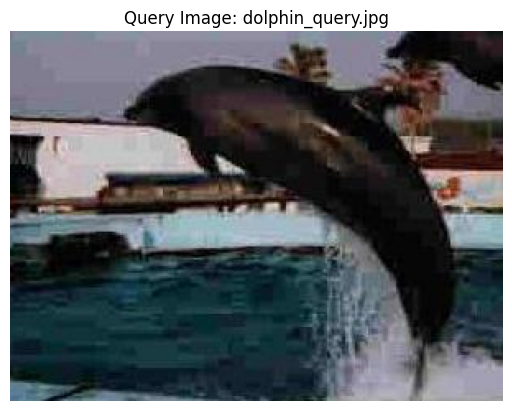

Results for dolphin_query.jpg:
a photo of a airplane: 0.07%
a photo of a ball: 0.00%
a photo of a car: 0.02%
a photo of a cat: 0.11%
a photo of a dolphin: 99.77%
a photo of a face: 0.00%
a photo of a lotus: 0.00%
a photo of a pickles: 0.02%
a photo of a strawberry: 0.00%
Predicted class: a photo of a dolphin
--------------------------------------------------


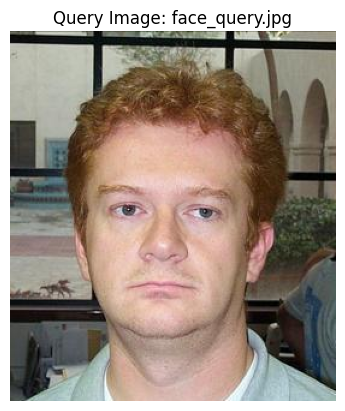

Results for face_query.jpg:
a photo of a airplane: 0.01%
a photo of a ball: 0.05%
a photo of a car: 0.12%
a photo of a cat: 0.09%
a photo of a dolphin: 0.02%
a photo of a face: 99.08%
a photo of a lotus: 0.00%
a photo of a pickles: 0.46%
a photo of a strawberry: 0.15%
Predicted class: a photo of a face
--------------------------------------------------


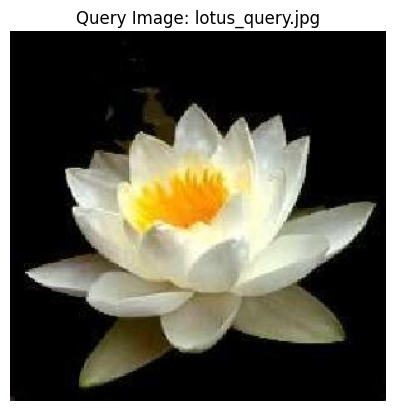

Results for lotus_query.jpg:
a photo of a airplane: 0.01%
a photo of a ball: 0.01%
a photo of a car: 0.02%
a photo of a cat: 0.01%
a photo of a dolphin: 0.00%
a photo of a face: 0.16%
a photo of a lotus: 99.77%
a photo of a pickles: 0.01%
a photo of a strawberry: 0.00%
Predicted class: a photo of a lotus
--------------------------------------------------


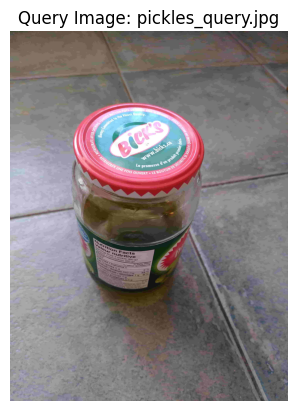

Results for pickles_query.jpg:
a photo of a airplane: 0.00%
a photo of a ball: 0.01%
a photo of a car: 0.00%
a photo of a cat: 0.01%
a photo of a dolphin: 0.00%
a photo of a face: 0.01%
a photo of a lotus: 0.00%
a photo of a pickles: 99.96%
a photo of a strawberry: 0.00%
Predicted class: a photo of a pickles
--------------------------------------------------


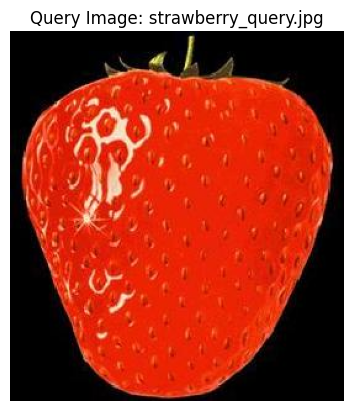

Results for strawberry_query.jpg:
a photo of a airplane: 0.00%
a photo of a ball: 0.01%
a photo of a car: 0.00%
a photo of a cat: 0.00%
a photo of a dolphin: 0.00%
a photo of a face: 0.01%
a photo of a lotus: 0.00%
a photo of a pickles: 0.00%
a photo of a strawberry: 99.98%
Predicted class: a photo of a strawberry
--------------------------------------------------


In [14]:
class CustomQueryDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') and '_query' in f]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.data_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        return image, img_name  # Return image and filename for reference

# Load query images
query_dataset = CustomQueryDataset("./TP1_data")

def test_query_images():
    for idx in range(len(query_dataset)):
        pil_image, img_name = query_dataset[idx]

        # Preprocess image with CLIP processor
        inputs = processor(
            text=text_prompts,
            images=pil_image,
            return_tensors="pt",
            padding=True
        )

        # Perform inference with the CLIP model
        with torch.no_grad():
            outputs = model(**inputs)

        # Get probabilities
        logits_per_image = outputs.logits_per_image  # shape [1, num_text_prompts]
        probs = logits_per_image.softmax(dim=-1).squeeze()

        # Display results
        plt.imshow(pil_image)
        plt.axis('off')
        plt.title(f"Query Image: {img_name}")
        plt.show()

        print(f"Results for {img_name}:")
        for prompt, prob in zip(text_prompts, probs):
            print(f"{prompt}: {prob:.2%}")

        predicted_class = text_prompts[probs.argmax()]
        print(f"Predicted class: {predicted_class}")
        print("-" * 50)

# Run the function to test query images
test_query_images()
